In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
reddit = pd.read_csv('reddit_data_example.csv') 
reddit.head()

,Date,Domain,Sentiment,Language,Author,Thread Entry Type,Reddit Author Awardee Karma,Reddit Author Awarder Karma,Reddit Author Karma,Reddit Comments,Reddit Score,Reddit Score Upvote Ratio
0,2/9/2023 20:12,reddit.com,neutral,en,AutoModerator,reply,2397363,0,2000,NaN,1,NaN
1,2/9/2023 17:42,reddit.com,neutral,en,AutoModerator,reply,2397218,0,2000,NaN,1,NaN
2,2/9/2023 17:41,reddit.com,neutral,en,AutoModerator,reply,2397218,0,2000,NaN,1,NaN
3,2/8/2023 22:12,reddit.com,negative,en,KaylaST,reply,110,14,1470,NaN,1,NaN
4,2/8/2023 20:15,reddit.com,negative,en,CaveLady3000,post,311,73,4148,0.0,1,1.0


In [5]:
reddit.shape 
#to know the rows and columns

(8137, 12)

In [6]:
reddit.columns

Index(['Date', 'Domain', 'Sentiment', 'Language', 'Author',
       'Thread Entry Type', 'Reddit Author Awardee Karma',
       'Reddit Author Awarder Karma', 'Reddit Author Karma', 'Reddit Comments',
       'Reddit Score', 'Reddit Score Upvote Ratio'],
      dtype='object')

In this case we don't have missing data but we know we have missing data because not every day posts are documented here.

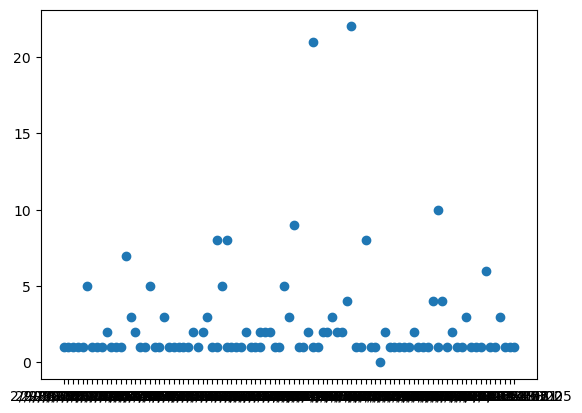

In [7]:
fig1, ax1 = plt.subplots() 
ax1.scatter(reddit['Date'][0:100], reddit['Reddit Score'][0:100]) 
#Here Data is X and Reddit Score is Y

plt.show()

Here each x value is treated as a category. Which is not the best way to do this. We will be cleaning this data.

In [8]:
pd.to_datetime('2024-10-15')

Timestamp('2024-10-15 00:00:00')

In [9]:
pd.to_datetime('2024-10-15').year

2024

In [10]:
pd.to_datetime('2024-10-15').month

10

In [11]:
pd.to_datetime('2024-10-15').day

15

In [12]:
pd.to_datetime('2024-10-15').second

0

Shift + Tab to know more about a function

Time by default is midnight, UTC 0, which is Greenwich time.

In [13]:
reddit['datetime'] = pd.to_datetime(reddit['Date']) 
reddit['datetime'].iloc[0:5]

0   2023-02-09 20:12:00
1   2023-02-09 17:42:00
2   2023-02-09 17:41:00
3   2023-02-08 22:12:00
4   2023-02-08 20:15:00
Name: datetime, dtype: datetime64[ns]

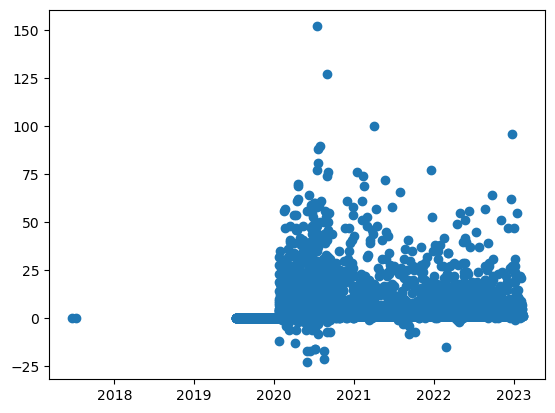

In [15]:
fig2, ax2 = plt.subplots() 
ax2.scatter(reddit['datetime'], reddit['Reddit Score']) 
#Here Data is X and Reddit Score is Y

plt.show()

We are going to include absent date for example 2018 and 2019.

reddit[reddit['datetime']< pd.to_datetime('2019-01-01')]['Full Text'] will not work in this case because the actual full text has been removed for privacy reasons as this is related to health posts which contains sensitive date

In [19]:
reddit[reddit['datetime']< pd.to_datetime('2019-01-01')]

,Date,Domain,Sentiment,Language,Author,Thread Entry Type,Reddit Author Awardee Karma,Reddit Author Awarder Karma,Reddit Author Karma,Reddit Comments,Reddit Score,Reddit Score Upvote Ratio,datetime
8135,7/8/2017 0:35,reddit.com,negative,en,#NAME?,post,0,0,0,0.0,0,NaN,2017-07-08 00:35:00
8136,6/20/2017 0:01,reddit.com,neutral,en,RaaaaeAnn,post,0,0,0,0.0,0,NaN,2017-06-20 00:01:00


In [20]:
(reddit['datetime'].min(), reddit['datetime'].max())

(Timestamp('2017-06-20 00:01:00'), Timestamp('2023-02-09 20:12:00'))

In [22]:
date_range = pd.date_range(start = '2017-06-20', end = '2023-02-09', freq='D')  
#Here freq='D', is for days and we can use other things 
date_range[0:10]

DatetimeIndex(['2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27',
               '2017-06-28', '2017-06-29'],
              dtype='datetime64[ns]', freq='D')

We will aggregate the date on a  daily basis.

In [25]:
reddit['datetime'].dt.date 
#We can use the dt to call the date or other values

0       2023-02-09
1       2023-02-09
2       2023-02-09
3       2023-02-08
4       2023-02-08
           ...    
8132    2019-07-09
8133    2019-07-09
8134    2019-07-09
8135    2017-07-08
8136    2017-06-20
Name: datetime, Length: 8137, dtype: object

In [26]:
reddit.groupby(reddit['datetime'].dt.date).count()

,Date,Domain,Sentiment,Language,Author,Thread Entry Type,Reddit Author Awardee Karma,Reddit Author Awarder Karma,Reddit Author Karma,Reddit Comments,Reddit Score,Reddit Score Upvote Ratio,datetime
datetime,,,,,,,,,,,,,
2017-06-20,1,1,1,1,1,1,1,1,1,1,1,0,1
2017-07-08,1,1,1,1,1,1,1,1,1,1,1,0,1
2019-07-09,4,4,4,4,4,4,4,4,4,0,4,0,4
2019-07-10,2,2,2,2,2,2,2,2,2,1,2,0,2
2019-07-11,1,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05,4,4,4,4,4,4,4,4,4,0,4,0,4
2023-02-06,2,2,2,2,2,2,2,2,2,0,2,0,2
2023-02-07,7,7,7,7,7,7,7,7,7,0,7,0,7


In [27]:
reddit_count_by_day = reddit.groupby(reddit['datetime'].dt.date)['Reddit Score'].count()

In [28]:
reddit_count_by_day

datetime
2017-06-20    1
2017-07-08    1
2019-07-09    4
2019-07-10    2
2019-07-11    1
             ..
2023-02-05    4
2023-02-06    2
2023-02-07    7
2023-02-08    9
2023-02-09    3
Name: Reddit Score, Length: 1181, dtype: int64

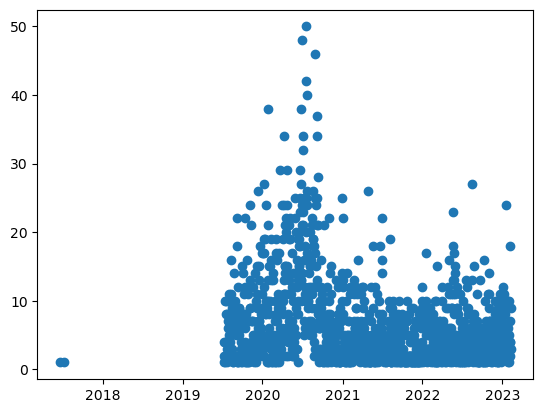

In [30]:
fig3, ax3 = plt.subplots() 
ax3.scatter(reddit_count_by_day.index, reddit_count_by_day) 
plt.show()

In [32]:
rds = pd.Series(reddit_count_by_day, index = date_range) 
rds.head()

2017-06-20    1.0
2017-06-21    NaN
2017-06-22    NaN
2017-06-23    NaN
2017-06-24    NaN
Freq: D, Name: Reddit Score, dtype: float64

In [33]:
rds.mean()

6.889923793395428

In [34]:
rds.max()

50.0

<function matplotlib.pyplot.show(close=None, block=None)>

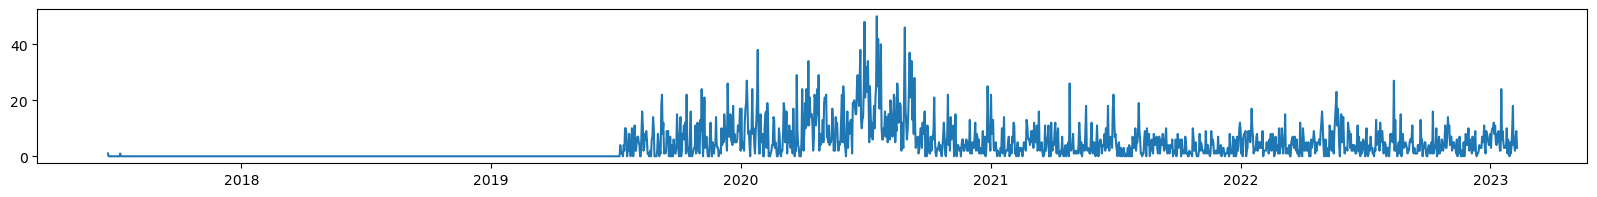

In [47]:
fig4, ax4 = plt.subplots(figsize =(20, 2)) 
ax4.plot(rds.index, rds.fillna(0)) 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

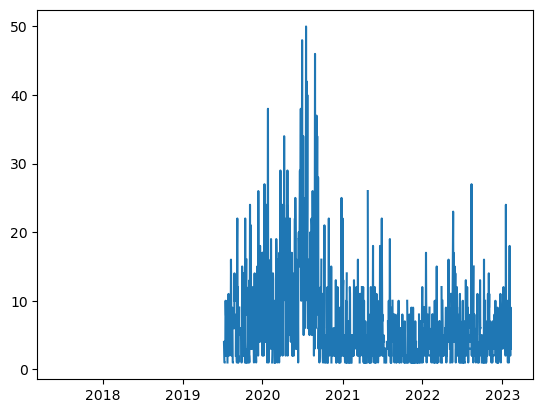

In [39]:
fig5, ax5 = plt.subplots() 
ax5.plot(rds.index, rds) 
plt.show

Line plot takes sequential lines so if there is a missing data in middle, the lines before that will not be drawn

<function matplotlib.pyplot.show(close=None, block=None)>

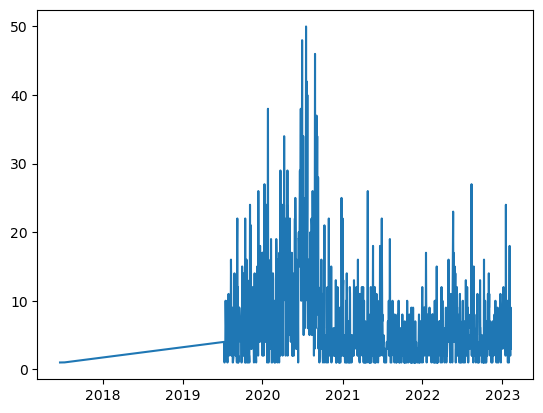

In [40]:
fig6, ax6 = plt.subplots() 
ax6.plot(rds.index, rds.interpolate(method = 'time')) 
plt.show

In [42]:
None == np.nan #This is pythonic expression for missing data which might not be suitable for everything

False

'999' #this for data where 999 entered for missing data. 'NaN' is in situation where NaN indicates missing data, usually in excel files.

In [45]:
reddit['datetime'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8132    False
8133    False
8134    False
8135    False
8136    False
Name: datetime, Length: 8137, dtype: bool

isnull() is the pandas fuction for missing data

In [ ]:
reddit.group(